In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import os
import re
% matplotlib inline

In [81]:
os.chdir(r"C:\Users\Mohiuddin\Desktop\machine learning\ML\Hackathon -HR Analytics")

In [82]:
train_data = pd.read_csv('train_LZdllcl.csv')

In [83]:
test_data = pd.read_csv('test_2umaH9m.csv')

In [8]:
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [9]:
test_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [11]:
train_data.shape

(54808, 14)

In [12]:
test_data.shape

(23490, 13)

In [144]:
train_data.describe()

,employee_id,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,52399.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,0.730529,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.477060,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,0.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,0.000000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,2.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [17]:
test_data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [41]:
def print_dataunique(df):
    Num = 0
    for i in df.columns:
        x = df.loc[:,i].unique()
        print(Num,i,type(df.loc[0,i]), len(x), x[0:5])
    Num +=1

In [42]:
print_dataunique(train_data)

0 employee_id <class 'numpy.int64'> 54808 [65438 65141  7513  2542 48945]
0 department <class 'str'> 9 ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D']
0 region <class 'str'> 34 ['region_7' 'region_22' 'region_19' 'region_23' 'region_26']
0 education <class 'str'> 4 ["Master's & above" "Bachelor's" nan 'Below Secondary']
0 gender <class 'str'> 2 ['f' 'm']
0 recruitment_channel <class 'str'> 3 ['sourcing' 'other' 'referred']
0 no_of_trainings <class 'numpy.int64'> 10 [1 2 3 4 7]
0 age <class 'numpy.int64'> 41 [35 30 34 39 45]
0 previous_year_rating <class 'numpy.float64'> 6 [ 5.  3.  1.  4. nan]
0 length_of_service <class 'numpy.int64'> 35 [ 8  4  7 10  2]
0 KPIs_met >80% <class 'numpy.int64'> 2 [1 0]
0 awards_won? <class 'numpy.int64'> 2 [0 1]
0 avg_training_score <class 'numpy.int64'> 61 [49 60 50 73 85]
0 is_promoted <class 'numpy.int64'> 2 [0 1]


In [43]:
def missing_value_analysis(df):
    '''
    Function to do basic missing value analysis
    Required Input - 
        - df = Pandas DataFrame
    Expected Output -
        - Chart of Missing value co-occurance
        - Chart of Missing value heatmap
    '''
    msno.matrix(df)
    msno.heatmap(df)

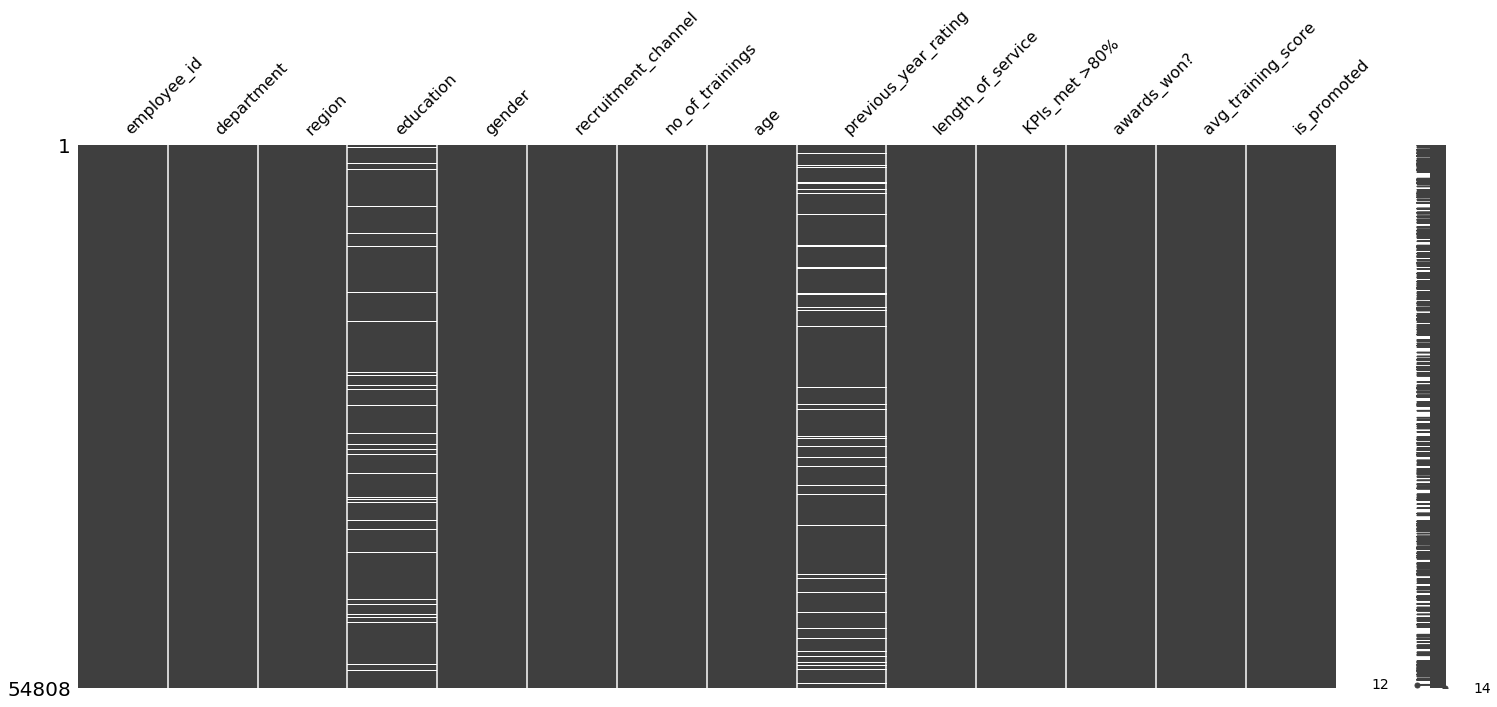

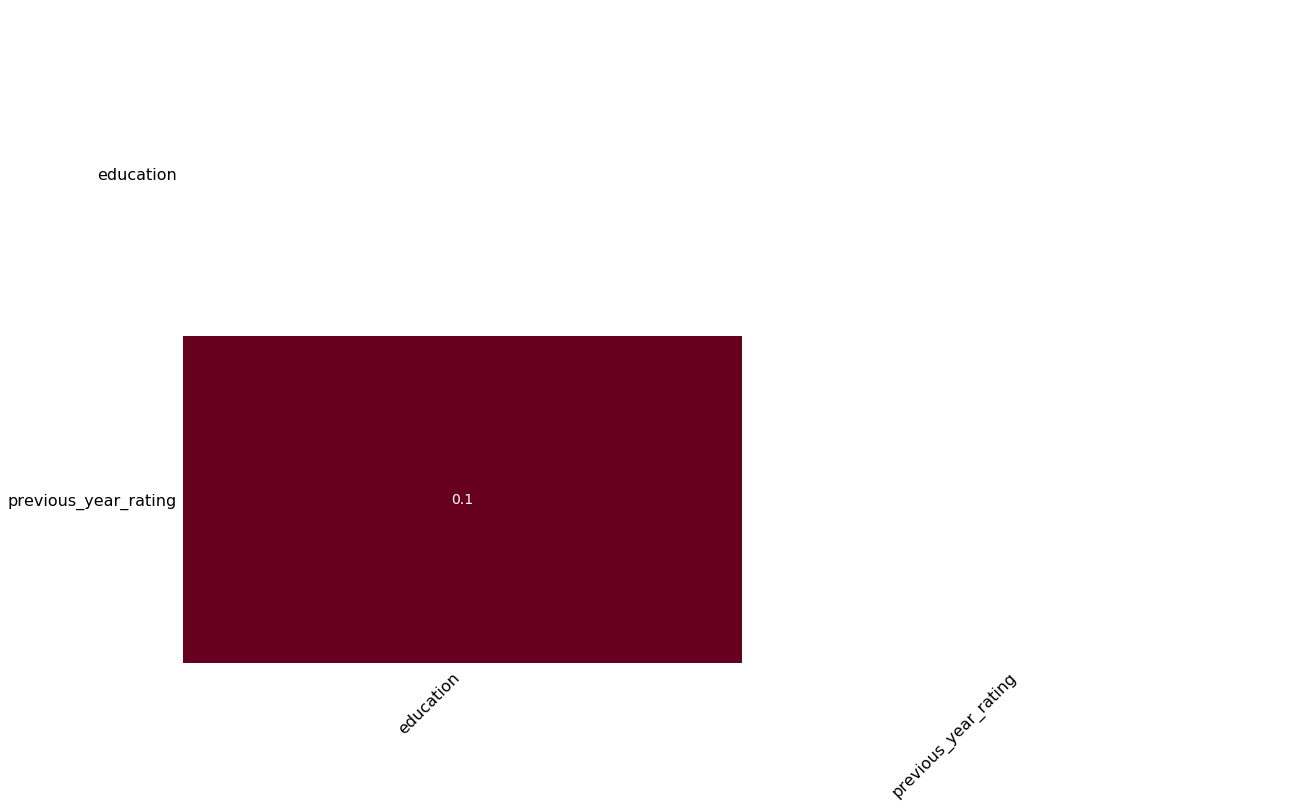

In [44]:
missing_value_analysis(train_data)

In [84]:
train_data['education']=train_data.education.map({"Master's & above":0,"Bachelor's":1,'Below Secondary':2}).astype('category')
train_data['gender'] = train_data.gender.map({"m":0,"f":1}).astype('category')
test_data['education']=test_data.education.map({"Master's & above":0,"Bachelor's":1,'Below Secondary':2}).astype('category')
test_data['gender'] = test_data.gender.map({"m":0,"f":1}).astype('category')

In [85]:
train_data = train_data.fillna(train_data['education'].value_counts().index[0])
test_data = test_data.fillna(test_data['education'].value_counts().index[0])


In [48]:
#displays number of NA values in whole data set as summary
test_data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [86]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train_data["recruitment_channel"] = labelencoder.fit_transform(train_data["recruitment_channel"])
test_data["recruitment_channel"] = labelencoder.fit_transform(test_data["recruitment_channel"])


In [50]:
train_data.dtypes

employee_id                int64
department                object
region                    object
education               category
gender                  category
recruitment_channel        int64
no_of_trainings            int64
age                        int64
previous_year_rating     float64
length_of_service          int64
KPIs_met >80%              int64
awards_won?                int64
avg_training_score         int64
is_promoted                int64
dtype: object

In [87]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

In [88]:
train_data = train_data.join(pd.DataFrame(lb.fit_transform(train_data["department"]),
                          columns=lb.classes_, 
                          index=train_data.index))

In [89]:
test_data = test_data.join(pd.DataFrame(lb.fit_transform(test_data["department"]),
                          columns=lb.classes_, 
                          index=test_data.index))

In [90]:
train_data.drop(['department',"region"], axis=1, inplace=True)

In [91]:
test_data.drop(['department',"region"], axis=1, inplace=True)

In [92]:
Y = train_data["is_promoted"]

In [93]:
train_data.drop(['is_promoted'], axis=1, inplace=True)

In [96]:
train_data.shape

(54808, 23)

In [97]:
test_data.shape

(23490, 23)

In [74]:
train_data.head()

,employee_id,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
0,65438,0.0,1,2,1,35,5.0,8,1,0,49,0,0,0,0,0,0,0,1,0
1,65141,1.0,0,0,1,30,5.0,4,0,0,60,0,0,0,0,1,0,0,0,0
2,7513,1.0,0,2,1,34,3.0,7,0,0,50,0,0,0,0,0,0,0,1,0
3,2542,1.0,0,0,2,39,1.0,10,0,0,50,0,0,0,0,0,0,0,1,0
4,48945,1.0,0,0,1,45,3.0,2,0,0,73,0,0,0,0,0,0,0,0,1


In [94]:
train_data["total"]=train_data["KPIs_met >80%"]+train_data["awards_won?"]+train_data["previous_year_rating"]
train_data["total_training"]=train_data["no_of_trainings"]+train_data["avg_training_score"]
test_data["total"]=test_data["KPIs_met >80%"]+test_data["awards_won?"]+test_data["previous_year_rating"]
test_data["total_training"]=test_data["no_of_trainings"]+test_data["avg_training_score"]


In [95]:
train_data["Joining_age"]=train_data["age"]-train_data["length_of_service"]
test_data["Joining_age"]=test_data["age"]-train_data["length_of_service"]


In [98]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
model.fit(train_data, Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [105]:
predictions = model.predict(test_data)
final_result = pd.DataFrame({'employee_id':test_data['employee_id'],'is_promoted':predictions})
final_result.to_csv('lgPredmodel1.csv',index=False)

In [104]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(train_data, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [102]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
# train the model using X_train_dtm (timing it with an IPython "magic command")
model.fit(train_data, Y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)